----------------------------------------
BLACK-SCHOLES PRICING RESULTS:
----------------------------------------
Underlying Price: $100
Strike Price:     $100
Volatility:       20.0%
----------------------------------------
Theoretical Call Price: $10.45
Theoretical Put Price:  $5.57
----------------------------------------


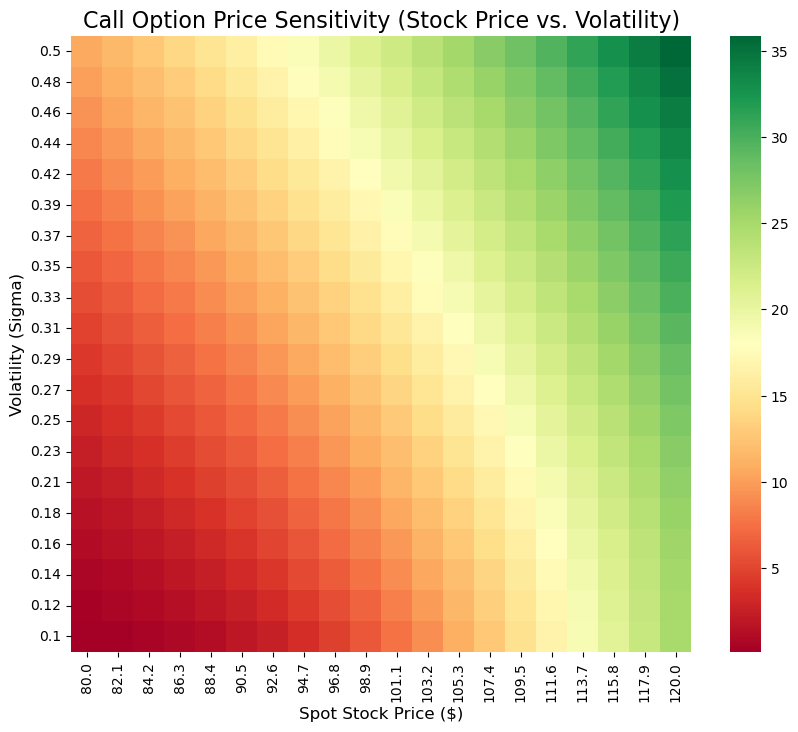

Visualization generated: The heatmap demonstrates that Option Prices increase as Volatility increases.


In [3]:
# --- PROJECT 3: OPTION PRICING (BLACK-SCHOLES MODEL) ---
# Author: Fares Awwad-Zeidan
# Concept: Financial Engineering & Derivatives Pricing
# Objective: Calculate Call/Put prices and visualize price sensitivity (Heatmap).

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# ==========================================
# 1. THE MATH (Black-Scholes Formulas)
# ==========================================
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Computes the theoretical price of a European option using the Black-Scholes model.
    
    Parameters:
    -----------
    S : float -> Current Stock Price (Spot Price)
    K : float -> Strike Price
    T : float -> Time to Maturity (in years)
    r : float -> Risk-free Interest Rate (decimal, e.g., 0.05 for 5%)
    sigma : float -> Volatility (Standard Deviation of log returns)
    option_type : str -> 'call' or 'put'
    
    Returns:
    --------
    price : float -> The theoretical option price
    """
    # Calculate d1 and d2 components
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        # Call Price = S * N(d1) - K * e^(-rT) * N(d2)
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        # Put Price = K * e^(-rT) * N(-d2) - S * N(-d1)
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    return price

# ==========================================
# 2. ANALYSIS (Generating Data)
# ==========================================
# Example Scenario:
# Stock Price (S): $100
# Strike Price (K): $100 (At-the-money)
# Time (T): 1 Year
# Risk-Free Rate (r): 5%
# Volatility (sigma): 20%

S_current = 100
K_strike = 100
T_time = 1.0
r_rate = 0.05 
sigma_vol = 0.2

call_price = black_scholes(S_current, K_strike, T_time, r_rate, sigma_vol, 'call')
put_price = black_scholes(S_current, K_strike, T_time, r_rate, sigma_vol, 'put')

print("-" * 40)
print(f"BLACK-SCHOLES PRICING RESULTS:")
print("-" * 40)
print(f"Underlying Price: ${S_current}")
print(f"Strike Price:     ${K_strike}")
print(f"Volatility:       {sigma_vol*100}%")
print("-" * 40)
print(f"Theoretical Call Price: ${call_price:.2f}")
print(f"Theoretical Put Price:  ${put_price:.2f}")
print("-" * 40)

# ==========================================
# 3. VISUALIZATION (Heatmap of Option Prices)
# ==========================================
# Objective: Visualize how the Call Price changes with Stock Price and Volatility.

# Define ranges for analysis
stock_prices = np.linspace(80, 120, 20)      # From $80 to $120
volatilities = np.linspace(0.1, 0.5, 20)     # From 10% to 50% volatility

# Initialize a grid (matrix) to store calculated prices
prices_grid = np.zeros((len(volatilities), len(stock_prices)))

# Loop through all combinations of Stock Price and Volatility
for i, vol in enumerate(volatilities):
    for j, s in enumerate(stock_prices):
        prices_grid[i, j] = black_scholes(s, K_strike, T_time, r_rate, vol, 'call')

# Plotting the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(prices_grid, 
            xticklabels=np.round(stock_prices, 1), 
            yticklabels=np.round(volatilities, 2), 
            cmap='RdYlGn', 
            annot=False) # Set annot=True if you want to see numbers inside squares

plt.title('Call Option Price Sensitivity (Stock Price vs. Volatility)', fontsize=16)
plt.xlabel('Spot Stock Price ($)', fontsize=12)
plt.ylabel('Volatility (Sigma)', fontsize=12)

# Invert Y-axis so low volatility is at the bottom
plt.gca().invert_yaxis()

plt.show()

print("Visualization generated: The heatmap demonstrates that Option Prices increase as Volatility increases.")